In [1]:
import pandas as pd

In [2]:
import pytrends
from pytrends.request import TrendReq

In [3]:
pytrends = TrendReq()

In [4]:
def get_trends(kw_list):
    i = 0
    data = pd.DataFrame()
    while i < len(kw_list)-1:
        kwlist = kw_list[i:(i+5)]
        pytrends.build_payload(kwlist, cat=0, timeframe='2020-02-01 2021-05-20', geo='BY', gprop='')
        trend = pytrends.interest_over_time()
        trend = trend.drop('isPartial', axis=1)
        if i == 0:
            data = trend
        else:
            data = data.merge(trend, on='date')
        i += 5
    return data

Ключевые слова разделены на три группы: лечение, симптомы, пневмония
функция get_trends() собирает данные по всем ключевым словам и возвращает статистику по запросам в указанное время

Важно: Google Trends не показывает абсолютное число запросов. Алгоритмы поисковика максимальному числу за период присваивают значение 100. Все другие значения графика определяются в процентном соотношении к максимуму.

Методология описана в статье:


https://innersun.medium.com/%D0%BA%D0%B0%D0%BA-%D1%83%D0%B2%D0%B8%D0%B4%D0%B5%D1%82%D1%8C-%D1%8D%D0%BF%D0%B8%D0%B4%D0%B5%D0%BC%D0%B8%D1%8E-%D0%B5%D1%81%D0%BB%D0%B8-%D0%B5%D1%91-%D1%81%D1%82%D0%B0%D1%80%D0%B0%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%BE-%D0%BF%D1%80%D1%8F%D1%87%D1%83%D1%82-%D0%BE%D0%BF%D1%8B%D1%82-5-%D1%80%D0%B5%D0%B3%D0%B8%D0%BE%D0%BD%D0%BE%D0%B2-10f6da83e5a8

ключевые слова для группы лечение

In [5]:
kw_list = ['азитрал','азитромицин','амоксициллин','левофлоксацин','линезолид','макролид', 'сумамед','цефалоспорин', 'цефтриаксон','гепарин','клексан','тромбо асс','дексаметазон','бромгексин','антикоагулянт']

In [6]:
treatment = get_trends(kw_list)

In [7]:
treatment['sum']=treatment.apply(sum, axis=1)

ключевые слова для группы симптомы

In [8]:
kw_list = ['сухой кашель','пропали запахи','пропало обоняние','болят мышцы','держится температура','низкая сатурация', 'боли в спине','тяжело дышать', 'вернуть обоняние','ломит тело','потливость','пропали вкусы','скачет температура','температура 37','температура 38']

In [9]:
symptoms = get_trends(kw_list)

In [10]:
symptoms['sum']=symptoms.apply(sum, axis=1)

ключевые слова для группы пневмония

In [11]:
kw_list = ['вирусная пневмония','двусторонняя пневмония','двухсторонняя пневмония','кт','пневмония при коронавирусе','воспаление легких','томография','пульмонолог', 'поражение легких','кт легких']

In [12]:
pneumonia = get_trends(kw_list)

In [13]:
pneumonia['sum']=pneumonia.apply(sum, axis=1)

Рисуем графики

In [14]:
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
mpl.style.use('ggplot')

In [15]:
alldata=pd.DataFrame()

In [16]:
alldata['date'] = treatment.index
alldata=alldata.merge(treatment['sum'], on='date')
alldata=alldata.merge(symptoms['sum'], on='date')
alldata=alldata.merge(pneumonia['sum'], on='date')
alldata=alldata.rename(columns={"sum_x": "treatment", "sum_y": "symptoms", 'sum':'pneumonia'})
alldata=alldata.set_index('date')
alldata.to_csv('out.csv')
alldata['sum'] = alldata.apply(sum, axis=1)

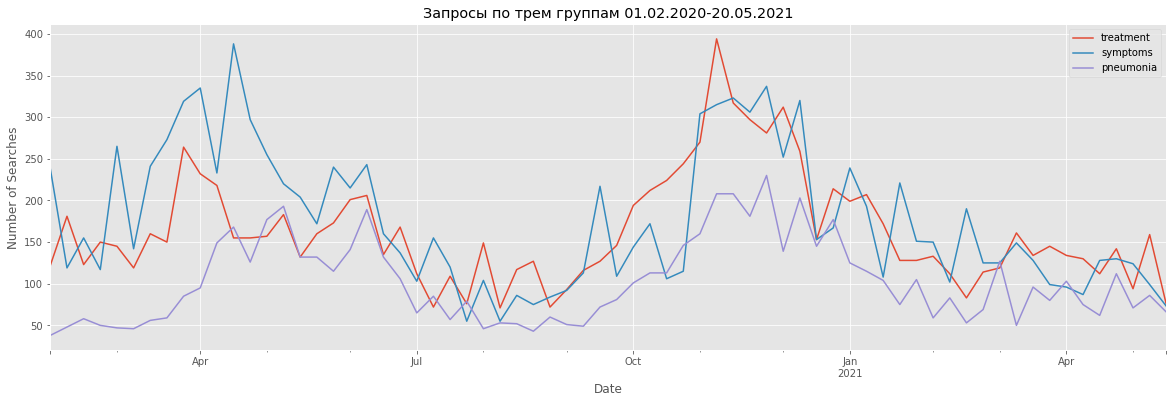

In [29]:
fig = plt.figure() 
ax0 = fig.add_subplot()
treatment['sum'].plot(kind='line', figsize=(20, 6),label='treatment', ax=ax0) 
symptoms['sum'].plot(kind='line', figsize=(20, 6),label='symptoms', ax=ax0) 
pneumonia['sum'].plot(kind='line', figsize=(20, 6),label='pneumonia', ax=ax0) 
ax0.set_ylabel('Number of Searches')
ax0.set_xlabel('Date')
plt.legend()
plt.title('Запросы по трем группам 01.02.2020-20.05.2021')

plt.show()

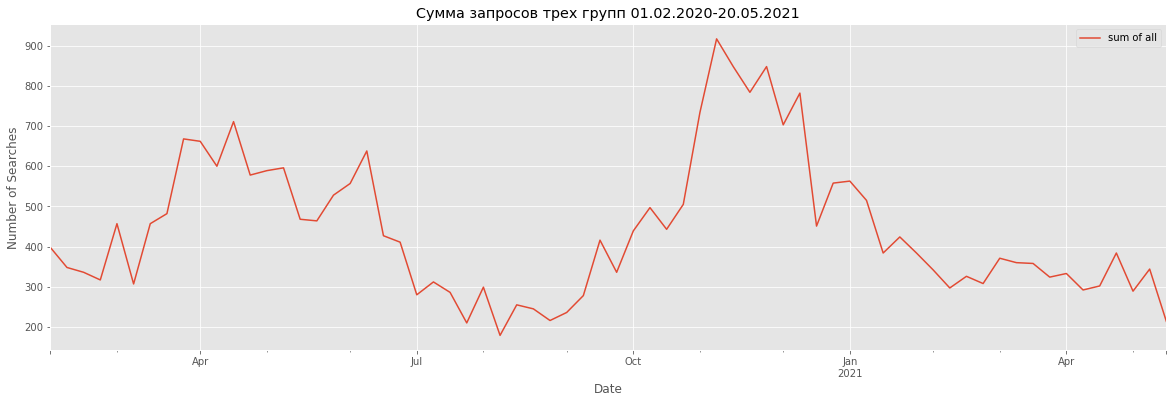

In [30]:
fig = plt.figure() 
ax0 = fig.add_subplot()
alldata['sum'].plot(kind='line', figsize=(20, 6),label='sum of all', ax=ax0) 
ax0.set_ylabel('Number of Searches')
ax0.set_xlabel('Date')
plt.legend()
plt.title('Сумма запросов трех групп 01.02.2020-20.05.2021')
plt.show()

Случаи Ковид а Минске по данным Медиазоны

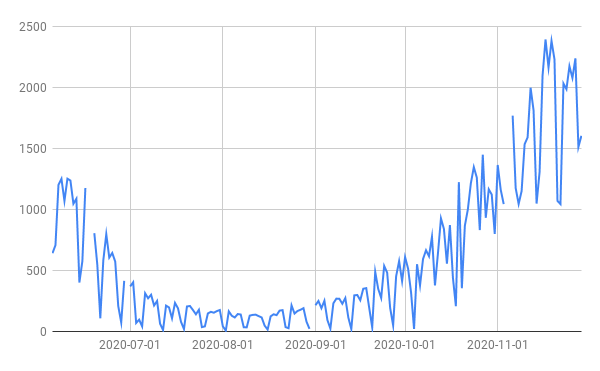

In [19]:
from IPython.display import Image
Image("/Users/a1/Downloads/chart (13).png")

Запросы Google в тех же датах

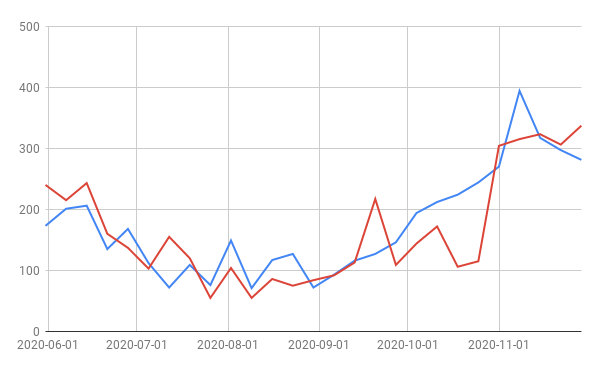

In [20]:
Image ('/Users/a1/Downloads/chart (14).png')

Слишком маленькая выборка данных, чтобы делать выводы. Но это может работать. 
Я выбрал ключевые слова из статьи с методологией, но их можно скорректировать для Беларуси. Я не очень ориетируюсь в лекарствах, которые прописывют у нас и тд.